# Digital Twin Simulation: Smart HVAC System

This project demonstrates a digital twin for a smart HVAC (Heating, Ventilation, and Air Conditioning) system using simulated IoT sensor data. It includes:\
	• Real-time data simulation\
	• Visualization of temperature, humidity, and airflow\
	• Predictive maintenance with a simple machine learning model (detecting when maintenance is needed)\
	• A basic anomaly detection module to flag unusual readings\
    
Built using Python, Jupyter Notebook, and libraries like pandas, matplotlib, scikit-learn, and seaborn.
This notebook simulates a **digital twin** of an HVAC system using synthetic sensor data. We:
1. Simulate real-time data (temperature, humidity, airflow)
2. Visualize system performance over time
3. Use a simple ML model to predict potential failures
4. Detect anomalies in sensor readings

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

sns.set()

# Load pre-saved data
df = pd.read_csv('simulated_sensor_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,temperature,humidity,airflow,fault
0,2025-01-01 00:00:00,22.496714,48.676367,350.188190,0
1,2025-01-01 00:05:00,21.861736,44.553068,338.283457,0
2,2025-01-01 00:10:00,22.647689,44.301366,366.957229,0
3,2025-01-01 00:15:00,23.523030,44.961161,368.972887,0
4,2025-01-01 00:20:00,21.765847,44.393640,351.566937,0


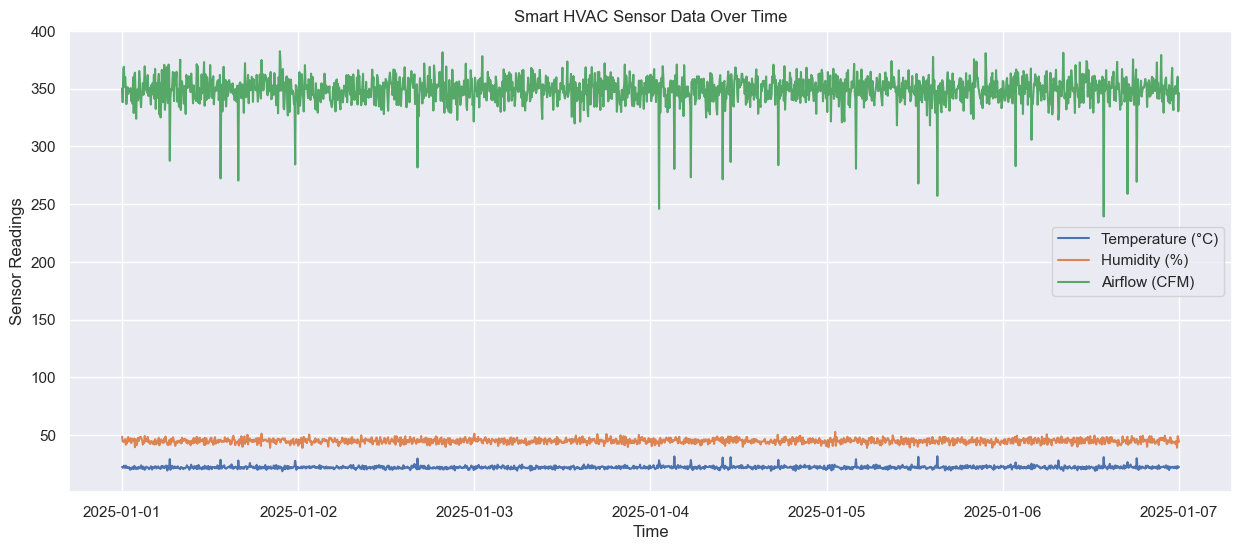

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['temperature'], label='Temperature (°C)')
plt.plot(df['timestamp'], df['humidity'], label='Humidity (%)')
plt.plot(df['timestamp'], df['airflow'], label='Airflow (CFM)')
plt.title('Smart HVAC Sensor Data Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend()
plt.show()

In [9]:
X = df[['temperature', 'humidity', 'airflow']]
y = df['fault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[342   0]
 [  0   4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00         4

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



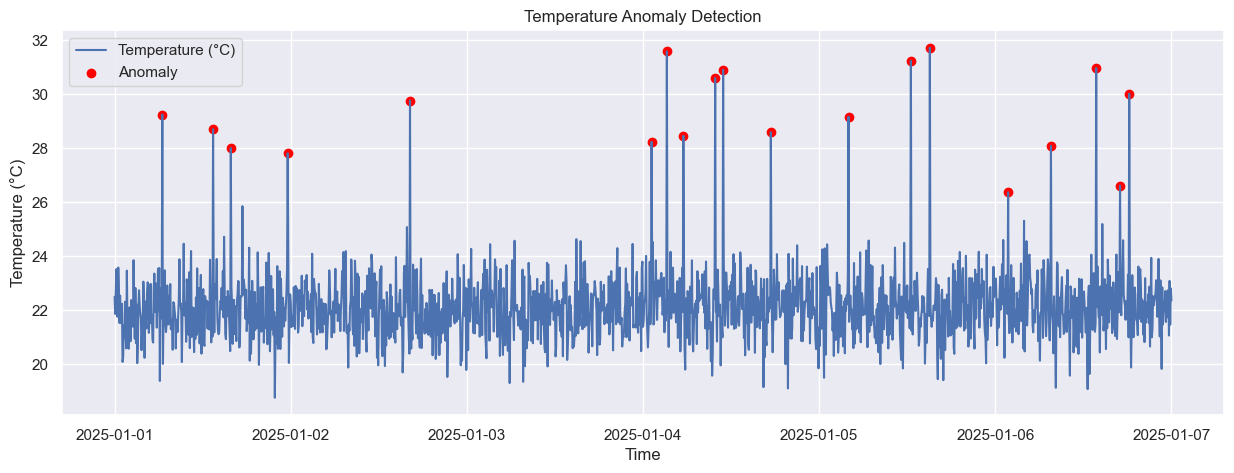

In [11]:
def detect_anomalies(series, threshold=3):
    mean = series.mean()
    std = series.std()
    z_scores = (series - mean) / std
    return np.abs(z_scores) > threshold

df['temp_anomaly'] = detect_anomalies(df['temperature'])

plt.figure(figsize=(15, 5))
plt.plot(df['timestamp'], df['temperature'], label='Temperature (°C)')
plt.scatter(df[df['temp_anomaly']]['timestamp'], df[df['temp_anomaly']]['temperature'], color='red', label='Anomaly')
plt.title('Temperature Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

## What Does This Project Demonstrate?
**• Digital Twin Concept:** This project simulates a digital twin of an HVAC system, reflecting live sensor data and showing how digital systems can monitor, predict, and alert on system health.\
**• ML Predictive Maintenance:** We build a model to predict whether the system is operating normally or needs attention.\
**• Anomaly Detection:** Basic unsupervised anomaly detection flags outliers even when no explicit fault label is available.